# Compute cka

In [28]:
import glob 
from tqdm.auto import trange, tqdm
import torch
from ckatorch import cka_base, plot_cka
import random 

def plot_cka_from_activations(
    embedding_a_files="image_hidden_states_last", 
    embedding_b_files=None, 
    num_samples=None,
    experiment_name="activations", 
    first_name=None,
    second_name=None,
    title=None,
):
    embeddings_a = []
    for a in tqdm(glob.glob(f"./{experiment_name}/**/{embedding_a_files}.pt"), leave=False, desc="Loading activations"):
        emb = torch.load(a)[None]
        embeddings_a.append(emb)
    
    if num_samples is not None:
        embeddings_a = random.sample(embeddings_a, num_samples)
        
    embeddings_a = torch.cat(embeddings_a)
    
    if embedding_b_files is not None:
        embeddings_b = []
        for b in tqdm(glob.glob(f"./{experiment_name}/**/{embedding_b_files}.pt"), leave=False, desc="Loading activations"):
            emb = torch.load(b)[None]
            embeddings_b.append(emb)
            
        if num_samples is not None:
            embeddings_b = random.sample(embeddings_b, num_samples)
        
        embeddings_b = torch.cat(embeddings_b)
    else:
        embeddings_b = embeddings_a
    
    embeddings_a = embeddings_a.permute(1, 0, 2)
    embeddings_b = embeddings_b.permute(1, 0, 2)
    
    print("embeddings_a.shape", embeddings_a.shape, "embeddings_b.shape", embeddings_b.shape)

    cka_matrices = torch.zeros(embeddings_a.shape[0], embeddings_b.shape[0])
    for i in trange(embeddings_a.shape[0], leave=False, desc="Computing CKA: i"):
        for j in trange(embeddings_b.shape[0], leave=False, desc="Computing CKA: j"):
            cka_matrices[i, j] = cka_base(embeddings_a[i], embeddings_b[j])
            cka_matrices[j, i] = cka_matrices[i, j]

    plot_cka(
        cka_matrices, 
        list(range(embeddings_a.shape[0])), 
        list(range(embeddings_b.shape[0])),
        show_annotations=False,
        title=title or "CKA Score",
        first_name=first_name or f"Layers {embedding_a_files}",
        second_name=second_name or f"Layers {embedding_b_files}",
    )

Loading activations:   0%|          | 0/9545 [00:00<?, ?it/s]/tmp/ipykernel_3774844/3688936456.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  emb = torch.load(a)[None]

embeddings_a.shape torch.Size([29, 1000, 3584]) embeddings_b.shape torch.Size([29, 1000, 3584])


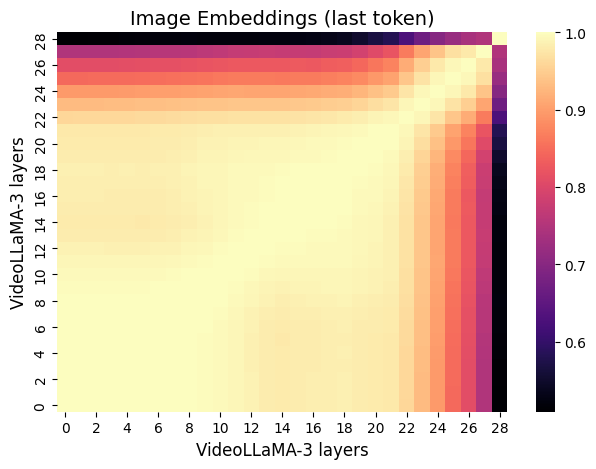

In [30]:
plot_cka_from_activations(
    "image_hidden_states_last", 
    num_samples=1000, 
    first_name="VideoLLaMA-3", second_name="VideoLLaMA-3", 
    title="Image Embeddings (last token)",
)

Loading activations:   0%|          | 0/9545 [00:00<?, ?it/s]/tmp/ipykernel_3774844/3688936456.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  emb = torch.load(a)[None]

embeddings_a.shape torch.Size([29, 1000, 3584]) embeddings_b.shape torch.Size([29, 1000, 3584])


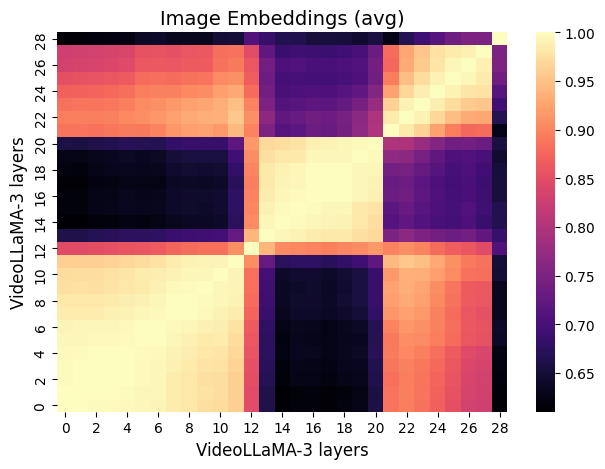

In [31]:
plot_cka_from_activations(
    "image_hidden_states_avg", 
    num_samples=1000,
    first_name="VideoLLaMA-3", 
    second_name="VideoLLaMA-3", 
    title="Image Embeddings (avg)",
)

Loading activations:   0%|          | 0/9534 [00:00<?, ?it/s]/tmp/ipykernel_3774844/3688936456.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  emb = torch.load(a)[None]

embeddings_a.shape torch.Size([29, 1000, 3584]) embeddings_b.shape torch.Size([29, 1000, 3584])


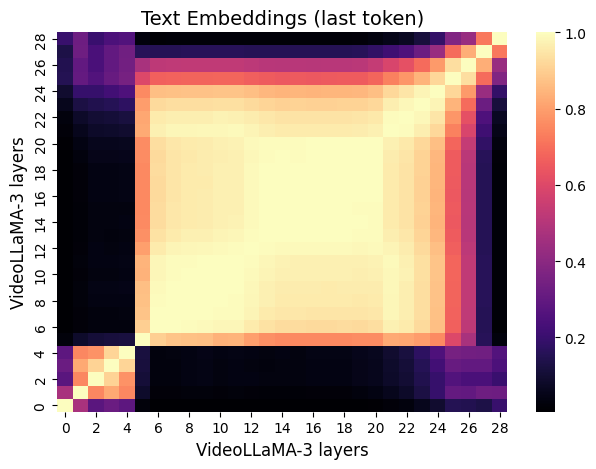

In [32]:
plot_cka_from_activations(
    "text_hidden_states_last", 
    num_samples=1000, 
    first_name="VideoLLaMA-3", second_name="VideoLLaMA-3", 
    title="Text Embeddings (last token)",
)

Loading activations:   0%|          | 0/9463 [00:00<?, ?it/s]

/tmp/ipykernel_3774844/3688936456.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  emb = torch.load(a)[None]


embeddings_a.shape torch.Size([29, 1000, 3584]) embeddings_b.shape torch.Size([29, 1000, 3584])


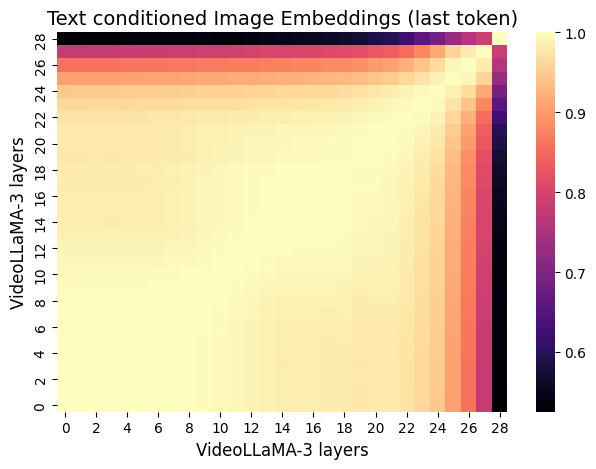

In [35]:
plot_cka_from_activations(
    num_samples=1000, 
    first_name="VideoLLaMA-3", second_name="VideoLLaMA-3", 
    title="Text conditioned Image Embeddings (last token)",
    experiment_name="activations-text+img",
)

Loading activations:   0%|          | 0/9545 [00:00<?, ?it/s]/tmp/ipykernel_3774844/3688936456.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  emb = torch.load(a)[None]

embeddings_a.shape torch.Size([29, 1000, 3584]) embeddings_b.shape torch.Size([29, 1000, 3584])


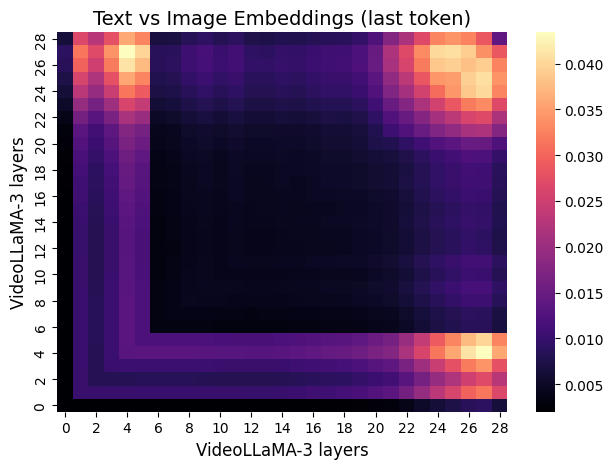

In [37]:
plot_cka_from_activations(
    "image_hidden_states_last",
    "text_hidden_states_last", 
    num_samples=1000, 
    first_name="VideoLLaMA-3", second_name="VideoLLaMA-3", 
    title="Text vs Image Embeddings (last token)",
)

# Compute KNN

In [7]:
!uv pip install torch==2.4.0 torchvision==0.19.0 torchaudio

Using Python 3.10.18 environment at: /home/wiss/zverev/miniconda3/envs/videollama3
Resolved 26 packages in 457ms                                        
⠙ Preparing packages... (0/14)                                                  
⠙ Preparing packages... (0/14)-------------     0 B/53.85 MiB           
⠙ Preparing packages... (0/14)------------- 16.00 KiB/53.85 MiB         
⠙ Preparing packages... (0/14)------------- 16.00 KiB/53.85 MiB         
nvidia-nvtx-cu12     ------------------------------     0 B/96.81 KiB
⠙ Preparing packages... (0/14)------------- 16.00 KiB/53.85 MiB         
nvidia-nvtx-cu12     ------------------------------     0 B/96.81 KiB
⠙ Preparing packages... (0/14)------------- 32.00 KiB/53.85 MiB         
nvidia-nvtx-cu12     ------------------------------     0 B/96.81 KiB
⠙ Preparing packages... (0/14)------------- 32.00 KiB/53.85 MiB         
nvidia-nvtx-cu12     ------------------------------     0 B/96.81 KiB
⠙ Preparing packages... (0/14)------------- 32.0

In [14]:
import glob 
from tqdm.auto import trange, tqdm
import torch
from ckatorch import cka_base, plot_cka
import random 
from metrics import AlignmentMetrics

def plot_from_activations(
    embedding_a_files="image_hidden_states_last", 
    embedding_b_files=None, 
    num_samples=None,
    experiment_name="activations", 
    first_name=None,
    second_name=None,
    title=None,
    metric="cka",
    **kwargs
):
    embeddings_a = []
    files = sorted(glob.glob(f"./{experiment_name}/**/{embedding_a_files}.pt"))
    for a in tqdm(files, leave=False, desc="Loading activations"):
        emb = torch.load(a)[None]
        embeddings_a.append(emb)
        
    embeddings_a = torch.cat(embeddings_a)
    
    if embedding_b_files is not None:
        embeddings_b = []
        files = sorted(glob.glob(f"./{experiment_name}/**/{embedding_b_files}.pt"))
        for b in tqdm(files, leave=False, desc="Loading activations"):
            emb = torch.load(b)[None]
            embeddings_b.append(emb)
        
        embeddings_b = torch.cat(embeddings_b)
    else:
        embeddings_b = embeddings_a
    
    if num_samples is not None:
        indices = torch.randperm(min(embeddings_a.shape[0], embeddings_b.shape[0]))[:num_samples]
        embeddings_a = embeddings_a[indices]
        embeddings_b = embeddings_b[indices]
    else:
        indices = None
    
    embeddings_a = embeddings_a.permute(1, 0, 2).float()
    embeddings_b = embeddings_b.permute(1, 0, 2).float()
    
    print("embeddings_a.shape", embeddings_a.shape, "embeddings_b.shape", embeddings_b.shape)

    cka_matrices = torch.zeros(embeddings_a.shape[0], embeddings_b.shape[0])
    for i in trange(embeddings_a.shape[0], leave=False, desc=f"Computing {metric}: i"):
        for j in trange(embeddings_b.shape[0], leave=False, desc=f"Computing {metric}: j"):
            cka_matrices[i, j] = AlignmentMetrics.measure(metric, embeddings_a[i], embeddings_b[j], **kwargs)
            cka_matrices[j, i] = cka_matrices[i, j]

    plot_cka(
        cka_matrices, 
        list(range(embeddings_a.shape[0])), 
        list(range(embeddings_b.shape[0])),
        show_annotations=False,
        title=title or "CKA Score",
        first_name=first_name or f"Layers {embedding_a_files}",
        second_name=second_name or f"Layers {embedding_b_files}",
    )

Loading activations:   0%|          | 0/9545 [00:00<?, ?it/s]/tmp/ipykernel_590576/2456137547.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  emb = torch.load(a)[None]


embeddings_a.shape torch.Size([29, 1000, 3584]) embeddings_b.shape torch.Size([29, 1000, 3584])


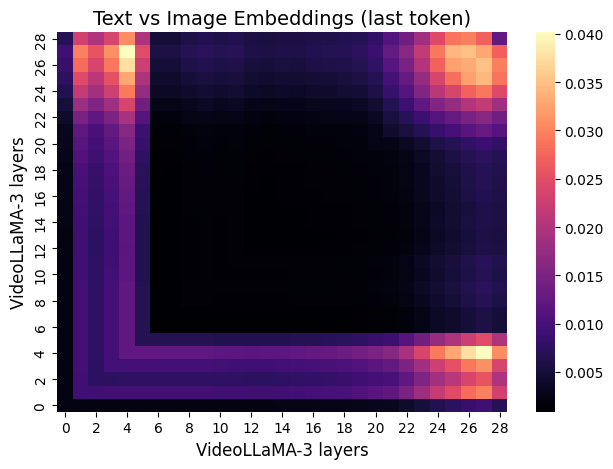

In [20]:
plot_from_activations(
    "image_hidden_states_last",
    "text_hidden_states_last", 
    num_samples=1000, 
    first_name="VideoLLaMA-3", second_name="VideoLLaMA-3", 
    title="Text vs Image Embeddings (last token)",
    metric="cka",
)

Loading activations:   0%|          | 0/9545 [00:00<?, ?it/s]/tmp/ipykernel_590576/2456137547.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  emb = torch.load(a)[None]


embeddings_a.shape torch.Size([29, 1000, 3584]) embeddings_b.shape torch.Size([29, 1000, 3584])


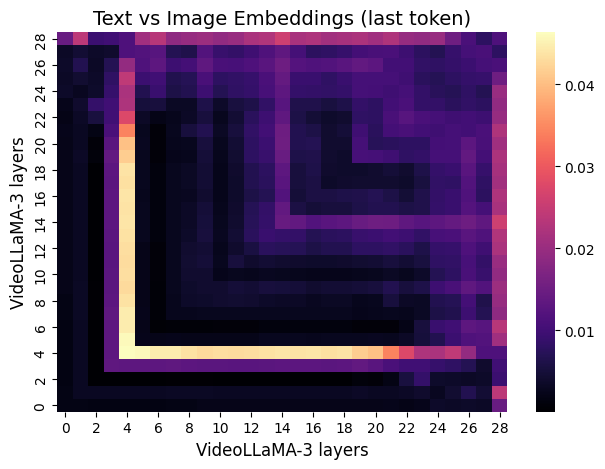

In [17]:
plot_from_activations(
    "image_hidden_states_last",
    "text_hidden_states_last", 
    num_samples=1000, 
    first_name="VideoLLaMA-3", second_name="VideoLLaMA-3", 
    title="Text vs Image Embeddings (last token)",
    metric="mutual_knn",
    topk=10,
)

Loading activations:   0%|          | 0/9545 [00:00<?, ?it/s]/tmp/ipykernel_590576/2456137547.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  emb = torch.load(a)[None]


embeddings_a.shape torch.Size([29, 1000, 3584]) embeddings_b.shape torch.Size([29, 1000, 3584])


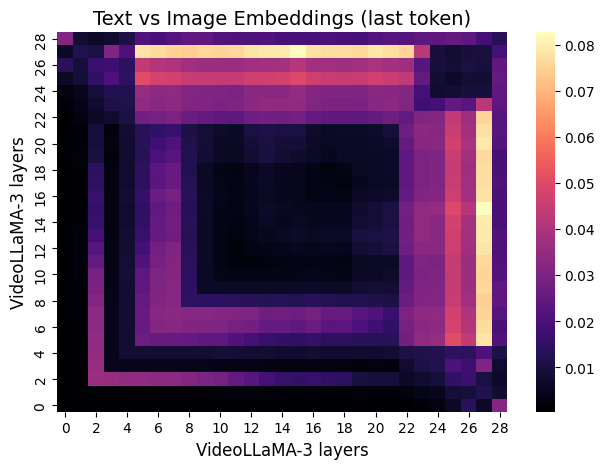

In [18]:
plot_from_activations(
    "image_hidden_states_last",
    "text_hidden_states_last", 
    num_samples=1000, 
    first_name="VideoLLaMA-3", second_name="VideoLLaMA-3", 
    title="Text vs Image Embeddings (last token)",
    metric="mutual_knn",
    topk=10,
)

Loading activations:   0%|          | 0/9545 [00:00<?, ?it/s]/tmp/ipykernel_590576/2456137547.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  emb = torch.load(a)[None]


embeddings_a.shape torch.Size([29, 1000, 3584]) embeddings_b.shape torch.Size([29, 1000, 3584])


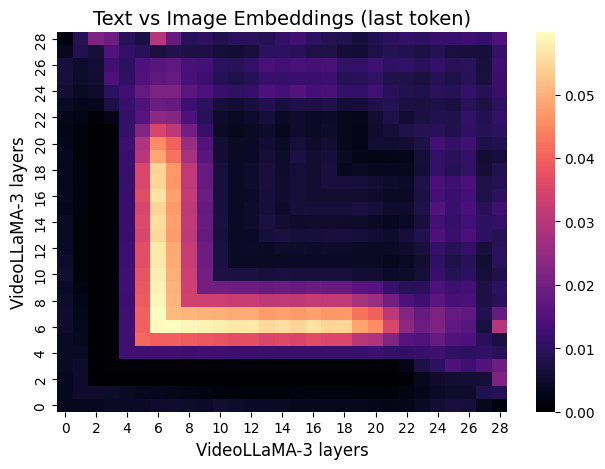

In [19]:
plot_from_activations(
    "image_hidden_states_last",
    "text_hidden_states_last", 
    num_samples=1000, 
    first_name="VideoLLaMA-3", second_name="VideoLLaMA-3", 
    title="Text vs Image Embeddings (last token)",
    metric="mutual_knn",
    topk=10,
)

Loading activations:   0%|          | 0/9545 [00:00<?, ?it/s]/tmp/ipykernel_590576/744297911.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  emb = torch.load(a)[None]
L

embeddings_a.shape torch.Size([29, 1000, 3584]) embeddings_b.shape torch.Size([29, 1000, 3584])


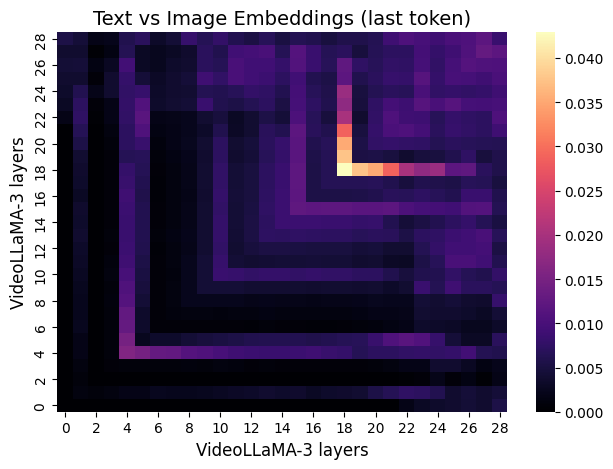

In [ ]:
plot_from_activations(
    "image_hidden_states_last",
    "text_hidden_states_last", 
    num_samples=5000, 
    first_name="VideoLLaMA-3", second_name="VideoLLaMA-3", 
    title="Text vs Image Embeddings (last token)",
    metric="mutual_knn",
    topk=10,
)